### 取得したデータからRSSIの値の変化を見る

In [2]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("./取得データセット/output.csv")

In [5]:
df.columns = ["UUIDs","Major","Minor","Accuracy","Proximity","TxPower","RSSI","device_name","timestamp"]

### 距離ごとにデータ分け

In [14]:
beacon1 = df[df["Minor"] == 35]
beacon2 = df[df["Minor"] == 38]

### 5M付近から検証

In [5]:
beacon1

,UUIDs,Major,Minor,Accuracy,Proximity,TxPower,RSSI,device_name,timestamp
0,00000000aaaa41441111110000000000,2,35,0.866442,near,-78,-75,rasp1,2017/09/20 17:13:55
3,00000000aaaa41441111110000000000,2,35,0.908852,near,-78,-76,rasp1,2017/09/20 17:13:55
6,00000000aaaa41441111110000000000,2,35,0.908852,near,-78,-76,rasp1,2017/09/20 17:13:56
9,00000000aaaa41441111110000000000,2,35,0.750722,near,-78,-72,rasp1,2017/09/20 17:13:56
14,00000000aaaa41441111110000000000,2,35,1.537381,near,-78,-87,rasp1,2017/09/20 17:13:56
16,00000000aaaa41441111110000000000,2,35,0.866442,near,-78,-75,rasp1,2017/09/20 17:13:57
18,00000000aaaa41441111110000000000,2,35,1.861210,near,-78,-91,rasp1,2017/09/20 17:13:57
20,00000000aaaa41441111110000000000,2,35,0.866442,near,-78,-75,rasp1,2017/09/20 17:13:57
23,00000000aaaa41441111110000000000,2,35,0.826011,near,-78,-74,rasp1,2017/09/20 17:13:57
26,00000000aaaa41441111110000000000,2,35,0.866442,near,-78,-75,rasp1,2017/09/20 17:13:57


### RSSIの情報を見る

In [17]:
print("データ数:%s" % beacon1["RSSI"].count())
print("平均値:%s" % beacon1["RSSI"].mean())
print("分散:%s" % beacon1["RSSI"].std())

データ数:11793
平均値:-83.33460527431527
分散:4.801571850026222


### RSSIの値の出力値のバラツキをみる

In [8]:
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

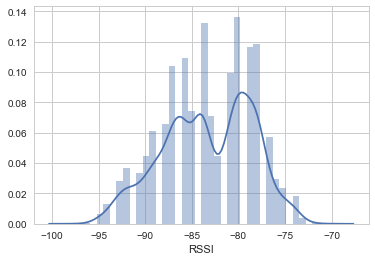

In [20]:
sns.distplot(beacon1["RSSI"])

### 正規分布に従うと仮定して検証

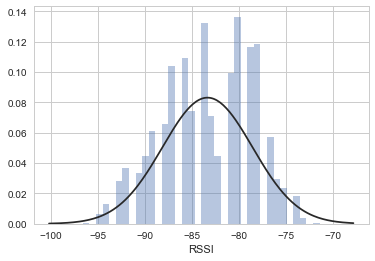

In [9]:
from scipy.stats import norm
sns.distplot(beacon1["RSSI"],fit=norm, kde=False)

### 外れ値を除外した状態で検証

In [10]:
### 前処理(取得個数が30未満のものは外れ値とする)
df_rssi_1 = pd.DataFrame(beacon1.groupby("RSSI")["UUIDs"].count().reset_index())
df_rssi_1 = df_rssi_1.rename(columns={"UUIDs":"count"})
df_rssi_1 = df_rssi_1[df_rssi_1["count"] >= 100]

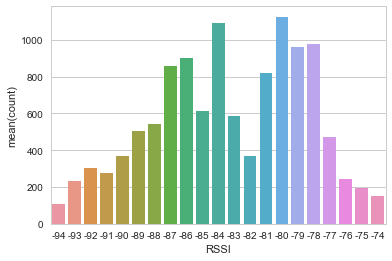

In [11]:
sns.barplot(x="RSSI",y="count",data=df_rssi_1)

5M付近？ではRSSI値のばらつきが大きすぎる。

### 1M付近で検証

In [12]:
beacon2

,UUIDs,Major,Minor,Accuracy,Proximity,TxPower,RSSI,device_name,timestamp
1,00000000aaaa41441111110000000000,2,38,0.898979,near,-70,-68,rasp1,2017/09/20 17:13:55
2,00000000aaaa41441111110000000000,2,38,1.054691,near,-70,-71,rasp1,2017/09/20 17:13:55
4,00000000aaaa41441111110000000000,2,38,0.898979,near,-70,-68,rasp1,2017/09/20 17:13:56
5,00000000aaaa41441111110000000000,2,38,1.173210,near,-70,-73,rasp1,2017/09/20 17:13:56
7,00000000aaaa41441111110000000000,2,38,0.898979,near,-70,-68,rasp1,2017/09/20 17:13:56
8,00000000aaaa41441111110000000000,2,38,1.000000,near,-70,-70,rasp1,2017/09/20 17:13:56
10,00000000aaaa41441111110000000000,2,38,0.808163,near,-70,-66,rasp1,2017/09/20 17:13:56
11,00000000aaaa41441111110000000000,2,38,0.898979,near,-70,-68,rasp1,2017/09/20 17:13:56
12,00000000aaaa41441111110000000000,2,38,0.948145,near,-70,-69,rasp1,2017/09/20 17:13:56
13,00000000aaaa41441111110000000000,2,38,1.054691,near,-70,-71,rasp1,2017/09/20 17:13:56


In [13]:
print("データ数:%s" % beacon2["RSSI"].count())
print("平均値:%s" % beacon2["RSSI"].mean())
print("分散:%s" % beacon2["RSSI"].std())

データ数:15176
平均値:-75.0305745914602
分散:5.625734077757774


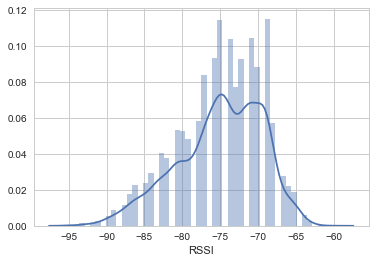

In [14]:
### データの分布
sns.distplot(beacon2["RSSI"])

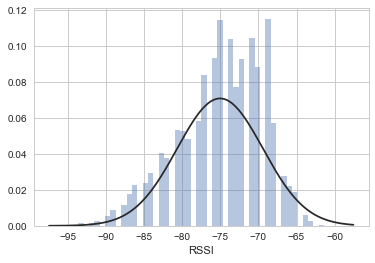

In [15]:
### 正規分布に従うと仮定して検証
from scipy.stats import norm
sns.distplot(beacon2["RSSI"],fit=norm, kde=False)

In [16]:
### 前処理(取得個数が100未満のものは外れ値とする)
df_rssi_2 = pd.DataFrame(beacon2.groupby("RSSI")["UUIDs"].count().reset_index())
df_rssi_2 = df_rssi_2.rename(columns={"UUIDs":"count"})
df_rssi_2 = df_rssi_2[df_rssi_2["count"] >= 100]

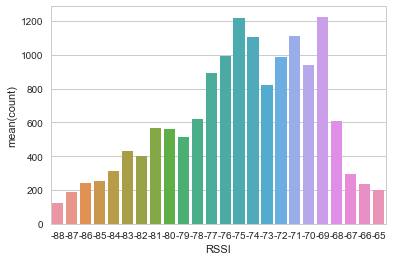

In [17]:
sns.barplot(x="RSSI",y="count",data=df_rssi_2)

うーん、、、

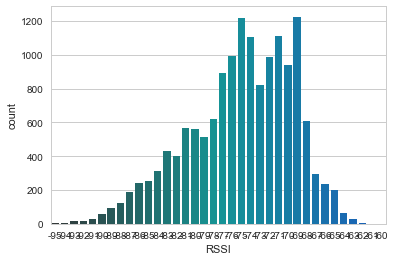

In [18]:
sns.countplot('RSSI',data=beacon2,palette="winter_d")

## 障害物が無い状態で検証
<img src="./RSSI取得実験図/pattern1.png" alt="パターン１">

In [14]:
# データセット読み込み (pattern1 = p1)
p1 = pd.read_csv("./取得データセット/pattern1.csv")
p1.columns = ["UUIDs","Major","Minor","Accuracy","Proximity","TxPower","RSSI","device_name","timestamp"]
# 発信機ごとに種類分け
p1_1 = p1[p1['UUIDs']  == "10000000aaaa41441111110000000000"]
p1_2 = p1[p1['UUIDs']  == "20000000aaaa41441111110000000000"]
p1_3 = p1[p1['UUIDs']  == "30000000aaaa41441111110000000000"]
p1_4 = p1[p1['UUIDs']  == "40000000aaaa41441111110000000000"]

### パターン1で取得したRSSIの分布をみる

In [15]:
# データの平均と分散
print("データ数:%s" % p1["RSSI"].count())
print("平均値:%s" % p1["RSSI"].mean())
print("分散:%s" % p1["RSSI"].std())

データ数:24076
平均値:-86.46818408373484
分散:2.5713222251985637


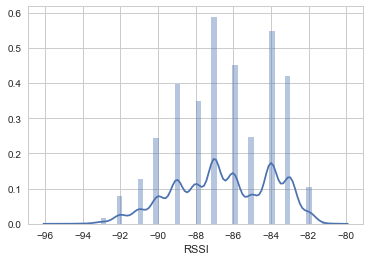

In [21]:
sns.distplot(p1["RSSI"])

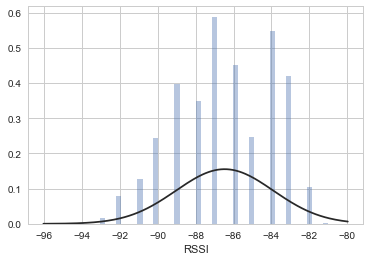

In [22]:
sns.distplot(p1["RSSI"],fit=norm, kde=False)

障害物がない状態で取得しているので分散が小さいことが見て取れる。  
これくらいの分散値なら予測は可能ではないか？  
1M45cm地点ではRSSIの値は80後半の値にまとまっている。

### 発信機の地点ごとのデータの分布をみる


In [23]:
# データの平均値
print("データの平均値")
print("地点1:%s" % p1_1["RSSI"].mean())
print("地点2:%s" % p1_2["RSSI"].mean())
print("地点3:%s" % p1_3["RSSI"].mean())
print("地点4:%s" % p1_4["RSSI"].mean())
# データの分散
print("データの分散")
print("地点1:%s" % p1_1["RSSI"].std())
print("地点2:%s" % p1_2["RSSI"].std())
print("地点3:%s" % p1_3["RSSI"].std())
print("地点4:%s" % p1_4["RSSI"].std())

データの平均値
地点1:-88.44041450777202
地点2:-86.0518028297581
地点3:-84.90305828043854
地点4:-86.64816408491107
データの分散
地点1:1.889911164281445
地点2:2.5349977053783923
地点3:1.8478738816873546
地点4:2.5741603135380697


平均値は地点による差はあまり見られない。  
分散は受信機に対して縦に設置した地点の値は小さい値を示すのに対し、側面に設置した地点は大きい値を示している

### パターン2(発信機を1Mごとに設置,受信機は地面に設置)
<img src="./RSSI取得実験図/pattern2.png" alt="パターン2">
前提知識：
電波の強さは距離の２乗に反比例して弱くなる。（フリスの伝達公式）

RSSIとTxPowerとdの関係式は以下のようになる。  
(RSSIは電波強度、TxPowerは１メートル離れた場所で測定した電波の強さ、dは距離)  
RSSI = TxPower - 20 * log(d)

距離dの計算式は以下。  
d = 10 ^ ((TxPower - RSSI) / 20)

In [14]:
# データセット読み込み (pattern2 = p2)
p2 = pd.read_csv("./取得データセット/pattern2.csv")
p2.columns = ["UUIDs","Major","Minor","Accuracy","Proximity","TxPower","RSSI","device_name","timestamp"]
# 発信機ごとに種類分け
p2_1 = p2[p2['UUIDs']  == "10000000aaaa41441111110000000000"]
p2_2 = p2[p2['UUIDs']  == "20000000aaaa41441111110000000000"]
p2_3 = p2[p2['UUIDs']  == "30000000aaaa41441111110000000000"]
p2_4 = p2[p2['UUIDs']  == "40000000aaaa41441111110000000000"]

In [30]:
# データの平均と分散
print("データ数:%s" % p2_4["RSSI"].count())
print("平均値:%s" % p2["RSSI"].mean())
print("分散:%s" % p2["RSSI"].std())

データ数:2413
平均値:-86.57476474355816
分散:3.316170133844798


地点によっては距離が離れている点もあることから分散の値がパターン１よりも大きい

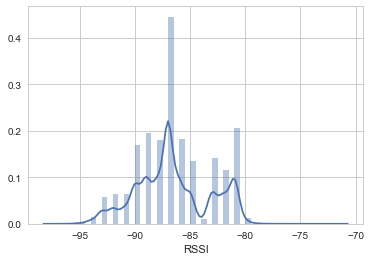

In [26]:
sns.distplot(p2["RSSI"])

平均値である-86の値が飛び抜けて多いことがわかる。

In [27]:
# データの平均値
print("データの平均値")
print("地点1:%s" % p2_1["RSSI"].mean())
print("地点2:%s" % p2_2["RSSI"].mean())
print("地点3:%s" % p2_3["RSSI"].mean())
print("地点4:%s" % p2_4["RSSI"].mean())
# データの分散
print("データの分散")
print("地点1:%s" % p2_1["RSSI"].std())
print("地点2:%s" % p2_2["RSSI"].std())
print("地点3:%s" % p2_3["RSSI"].std())
print("地点4:%s" % p2_4["RSSI"].std())

データの平均値
地点1:-83.02116483856017
地点2:-87.61260396673065
地点3:-88.09497964721845
地点4:-90.16825528387899
データの分散
地点1:2.3098950238455007
地点2:2.8158351622141207
地点3:1.055778608843928
地点4:0.8618716267358423


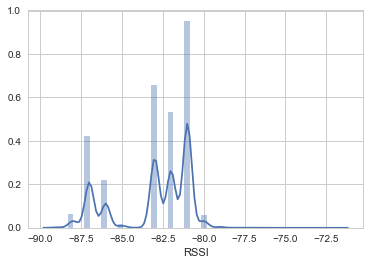

In [16]:
sns.distplot(p2_1["RSSI"])

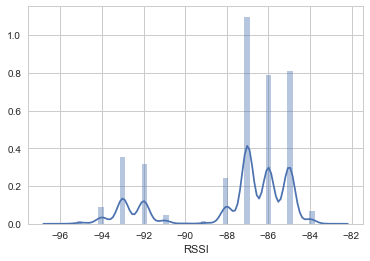

In [29]:
sns.distplot(p2_2["RSSI"])

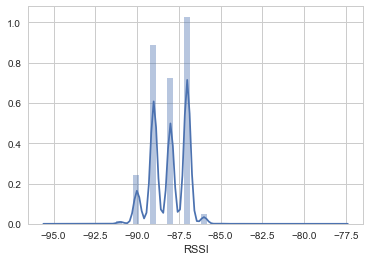

In [30]:
sns.distplot(p2_3["RSSI"])

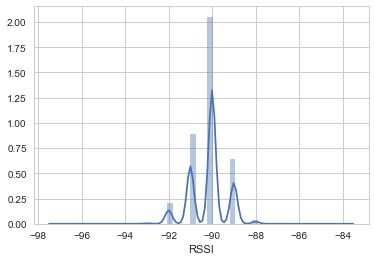

In [31]:
sns.distplot(p2_4["RSSI"])

In [33]:
p2_1

,UUIDs,Major,Minor,Accuracy,Proximity,TxPower,RSSI,device_name,timestamp
0,10000000aaaa41441111110000000000,2,38,1.210637,near,-78,-82,rasp2,2017/10/03 15:39:27
3,10000000aaaa41441111110000000000,2,38,1.465642,near,-78,-86,rasp2,2017/10/03 15:39:27
4,10000000aaaa41441111110000000000,2,38,1.210637,near,-78,-82,rasp2,2017/10/03 15:39:27
7,10000000aaaa41441111110000000000,2,38,1.210637,near,-78,-82,rasp2,2017/10/03 15:39:28
10,10000000aaaa41441111110000000000,2,38,1.210637,near,-78,-82,rasp2,2017/10/03 15:39:28
15,10000000aaaa41441111110000000000,2,38,1.210637,near,-78,-82,rasp2,2017/10/03 15:39:28
18,10000000aaaa41441111110000000000,2,38,1.210637,near,-78,-82,rasp2,2017/10/03 15:39:28
19,10000000aaaa41441111110000000000,2,38,1.465642,near,-78,-86,rasp2,2017/10/03 15:39:29
20,10000000aaaa41441111110000000000,2,38,1.154145,near,-78,-81,rasp2,2017/10/03 15:39:29
22,10000000aaaa41441111110000000000,2,38,1.210637,near,-78,-82,rasp2,2017/10/03 15:39:29


### パターン3(発信機を1Mごとに設置,受信機を50cmの高さに設置)
<img src="./RSSI取得実験図/pattern3.png" alt="パターン3">

In [41]:
# データセット読み込み (pattern3 = p3)
p3 = pd.read_csv("./取得データセット/pattern3.csv")
p3.columns = ["UUIDs","Major","Minor","Accuracy","Proximity","TxPower","RSSI","device_name","timestamp"]
# 発信機ごとに種類分け
p3_1 = p3[p3['UUIDs']  == "10000000aaaa41441111110000000000"]
p3_2 = p3[p3['UUIDs']  == "20000000aaaa41441111110000000000"]
p3_3 = p3[p3['UUIDs']  == "30000000aaaa41441111110000000000"]
p3_4 = p3[p3['UUIDs']  == "40000000aaaa41441111110000000000"]

In [42]:
# データの平均と分散
print("データ数:%s" % p2["RSSI"].count())
print("平均値:%s" % p2["RSSI"].mean())
print("分散:%s" % p2["RSSI"].std())

データ数:20297
平均値:-86.57476474355816
分散:3.316170133844798


平均値及び分散の値はパターン２の場合とほとんど変わらないことが見て取れる。

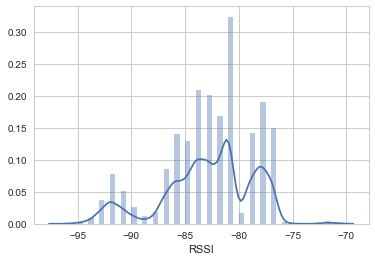

In [43]:
sns.distplot(p3["RSSI"])

RSSIの値を取ったグラフでは値にばらつきがあるのが見て取れる。  
地点によりRSSI値に差があるのか？？

In [44]:
# データの平均値
print("データの平均値")
print("地点1:%s" % p3_1["RSSI"].mean())
print("地点2:%s" % p3_2["RSSI"].mean())
print("地点3:%s" % p3_3["RSSI"].mean())
print("地点4:%s" % p3_4["RSSI"].mean())
# データの分散
print("データの分散")
print("地点1:%s" % p3_1["RSSI"].std())
print("地点2:%s" % p3_2["RSSI"].std())
print("地点3:%s" % p3_3["RSSI"].std())
print("地点4:%s" % p3_4["RSSI"].std())

データの平均値
地点1:-80.31168627450981
地点2:-82.10675979047144
地点3:-87.7454268292683
地点4:-83.05276134122288
データの分散
地点1:3.979348938580814
地点2:1.1684802139526067
地点3:4.109459063538527
地点4:1.9360114510479751


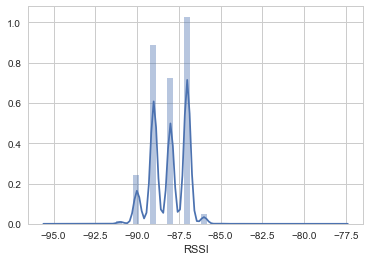

In [49]:
sns.distplot(p2_3["RSSI"])

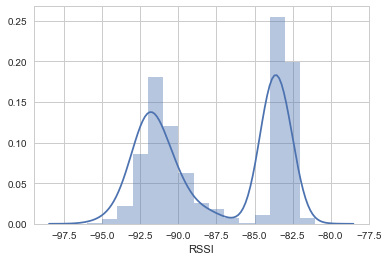

In [46]:
sns.distplot(p3_3["RSSI"])

In [56]:
time_df = p3[["RSSI","timestamp"]]

In [57]:
sns.jointplot(x="timestamp", y="RSSI", data=time_df)

ValueError: could not convert string to float: '2017/10/03 16:23:39'

ValueError: could not convert string to float: '2017/10/03 16:23:39'

地点３の値だけがRSSIの平均値も低くデータの分散も大きい。  
考えられる点として椅子の上に設置したため地点３からは椅子のヘリに電波がぶつかっていたのか？  
受信端末の設置向きにも影響されるだろう。  
現場写真を撮り忘れてしまっているので次にデータ取りを行った時に検証したい。